# Table of Contents
1. [Weather Data](#WeatherData)
2. [Test Calendar Data](#CalendarData)
3. [Grib data](#Grib2Data)

In [1]:
import pandas as pd
import numpy as np

## Weather Data <a name="WeatherData"> </a>

In [5]:
df=pd.read_pickle('../pytools/data/grib2_folder_0.pkl')
df.head()

,filename,folder,type,timestamp,cplt_timestamp
0,hrrrsub_2018_01_01_00F0.grib2,/Volumes/T7 Blue/grib2_2018,hrrr_obs,2018-01-01 00:00:00,2018-01-01 00:00:00
1,hrrrsub_2018_01_01_01F0.grib2,/Volumes/T7 Blue/grib2_2018,hrrr_obs,2018-01-01 01:00:00,2018-01-01 01:00:00
2,hrrrsub_2018_01_01_02F0.grib2,/Volumes/T7 Blue/grib2_2018,hrrr_obs,2018-01-01 02:00:00,2018-01-01 02:00:00
3,hrrrsub_2018_01_01_03F0.grib2,/Volumes/T7 Blue/grib2_2018,hrrr_obs,2018-01-01 03:00:00,2018-01-01 03:00:00
4,hrrrsub_2018_01_01_04F0.grib2,/Volumes/T7 Blue/grib2_2018,hrrr_obs,2018-01-01 04:00:00,2018-01-01 04:00:00


In [6]:
df.iloc[-6]

filename           hrrrsub_2024_02_08_07F0.grib2
folder            /Volumes/T7 Gray/hrrr_obs_2023
type                                    hrrr_obs
timestamp                    2024-02-08 07:00:00
cplt_timestamp               2024-02-08 07:00:00
Name: 53515, dtype: object

In [7]:
df.type.value_counts()

hrrr_obs     45894
utah_grib     6994
Name: type, dtype: int64

## Test calendar <a name="CalendarData"> </a>

In [1]:
import holidays
import datetime as dt
import pytz

In [3]:
for date, name in sorted(holidays.US(subdiv='NY', years=2023).items()):
    print(date, name)

2023-01-01 New Year's Day
2023-01-02 New Year's Day (observed)
2023-01-16 Martin Luther King Jr. Day
2023-02-12 Lincoln's Birthday
2023-02-13 Lincoln's Birthday (observed)
2023-02-15 Susan B. Anthony Day
2023-02-20 Washington's Birthday
2023-05-29 Memorial Day
2023-06-19 Juneteenth National Independence Day
2023-07-04 Independence Day
2023-09-04 Labor Day
2023-10-09 Columbus Day
2023-11-07 Election Day
2023-11-10 Veterans Day (observed)
2023-11-11 Veterans Day
2023-11-23 Thanksgiving
2023-12-25 Christmas Day


In [10]:
h = holidays.US(subdiv='NY', years=2023)
dt.date(2023,1,2) in h



True

In [10]:
from datetime import datetime, timedelta, timezone
import pytz

def is_daylight_saving(date, tz):
    # Checks if a given date is in daylight saving time.
    # Returns True if the date is in daylight saving time, False otherwise.
    timezone = pytz.timezone(tz)
    date = timezone.localize(datetime.strptime(date, '%Y-%m-%d'))
    return date.dst() != timedelta(0)

# Example 1
date = '2022-06-01'
tz = 'US/Eastern'

if is_daylight_saving(date, tz):
    print('Yes, date is in DayLight Saving')
else:
    print('No, date is not in DayLight Saving')

# Example 2
date = '2022-12-01'
tz = 'US/Eastern'

if is_daylight_saving(date, tz):
    print('Yes, date is in DayLight Saving')
else:
    print('No, date is not in DayLight Saving')

Yes, date is in DayLight Saving
No, date is not in DayLight Saving


In [19]:
import pprint
pprint.pprint(list(filter(lambda x: x.startswith('US'), pytz.all_timezones)))
# America/New_York

['US/Alaska',
 'US/Aleutian',
 'US/Arizona',
 'US/Central',
 'US/East-Indiana',
 'US/Eastern',
 'US/Hawaii',
 'US/Indiana-Starke',
 'US/Michigan',
 'US/Mountain',
 'US/Pacific',
 'US/Samoa']


## Test Grib2 <a name="Grib2Data"> </a>

- create npy data, save to an npz file

- load the npz file, and review

In [3]:
from pytools.config import Config
from pytools.weather_task import hist_load
from pytools.utilities import get_absolute_path


config_file = "../pytools/config/albany_test.toml"
dm = hist_load(config_file=config_file)

d = hist_load(config_file=config_file, create=False)
config = Config(config_file)
#hour_offset = config.load["utc_to_local_hours"]
parallel=False
n_cores=7
d.build_weather(
    weather=config.weather,
    center=config.site["center"],
    rect=config.site["rect"],)
wdata = d.weather.make_npy_data_from_inventory(        
    center=[-73.518, 40.779],
    rect=[100, 35, 30, 20],
    inventory_file=config.weather_pdt.hist_weather_pickle,
    parallel=True,
    folder_col_name=config.weather_pdt.folder_col_name,
    filename_col_name=config.weather_pdt.filename_col_name,
    type_col_name=config.weather_pdt.type_col_name,

    t0=np.datetime64('2018-02-01'),
    t1=np.datetime64('2018-02-03T08:00'),
    n_cores=7)

wdata.save_unscaled_npz('li_test.npz')



... Check hist_load at /Users/limingzhou/zhoul/work/energy/sites/albany-test/nyiso/electric_load/albany-test

INFO:weather_tasks:... Check hist_load at /Users/limingzhou/zhoul/work/energy/sites/albany-test/nyiso/electric_load/albany-test

Use the existing manager...

INFO:weather_tasks:Use the existing manager...

... Check hist_load at /Users/limingzhou/zhoul/work/energy/sites/albany-test/nyiso/electric_load/albany-test

INFO:weather_tasks:... Check hist_load at /Users/limingzhou/zhoul/work/energy/sites/albany-test/nyiso/electric_load/albany-test

Use the existing manager...

INFO:weather_tasks:Use the existing manager...



process.../Volumes/T7 Blue/grib2_2018/hrrrsub_2018_02_03_01F0.grib2process.../Volumes/T7 Blue/grib2_2018/hrrrsub_2018_02_01_00F0.grib2



/Users/limingzhou/miniforge3/envs/energy_x86/lib/python3.9/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
cannot load library '/Users/limingzhou/miniforge3/envs/energy_x86/bin/../lib/libeccodes.dylib': dlopen(/Users/limingzhou/miniforge3/envs/energy_x86/bin/../lib/libeccodes.dylib, 0x0002): tried: '/Users/limingzhou/miniforge3/envs/energy_x86/bin/../lib/libeccodes.dylib' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64')), '/System/Volumes/Preboot/Cryptexes/OS/Users/limingzhou/miniforge3/envs/energy_x86/bin/../lib/libeccodes.dylib' (no such file), '/Users/limingzhou/miniforge3/envs/energy_x86/bin/../lib/libeccodes.dylib' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64')), '/Users/limingzhou/miniforge3/envs/energy_x86/lib/libeccodes.dylib' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64')), '/System/Volumes/Preboot/Cryptexes/OS/Users/limingzhou/miniforge

process.../Volumes/T7 Blue/grib2_2018/hrrrsub_2018_02_03_02F0.grib2
process.../Volumes/T7 Blue/grib2_2018/hrrrsub_2018_02_01_01F0.grib2
process.../Volumes/T7 Blue/grib2_2018/hrrrsub_2018_02_03_03F0.grib2
process.../Volumes/T7 Blue/grib2_2018/hrrrsub_2018_02_01_02F0.grib2
process.../Volumes/T7 Blue/grib2_2018/hrrrsub_2018_02_03_04F0.grib2
process.../Volumes/T7 Blue/grib2_2018/hrrrsub_2018_02_01_03F0.grib2
process.../Volumes/T7 Blue/grib2_2018/hrrrsub_2018_02_03_05F0.grib2
process.../Volumes/T7 Blue/grib2_2018/hrrrsub_2018_02_01_04F0.grib2
process.../Volumes/T7 Blue/grib2_2018/hrrrsub_2018_02_03_06F0.grib2
process.../Volumes/T7 Blue/grib2_2018/hrrrsub_2018_02_01_05F0.grib2
process.../Volumes/T7 Blue/grib2_2018/hrrrsub_2018_02_03_07F0.grib2
process.../Volumes/T7 Blue/grib2_2018/hrrrsub_2018_02_01_06F0.grib2
process.../Volumes/T7 Blue/grib2_2018/hrrrsub_2018_02_03_08F0.grib2
process.../Volumes/T7 Blue/grib2_2018/hrrrsub_2018_02_01_07F0.grib2
process.../Volumes/T7 Blue/grib2_2018/hrrrsub_20

TypeError: save_unscaled_npz() got an unexpected keyword argument 'save_npz_file'

In [16]:
# extract weather data
#wdata.save_unscaled_npz('li_test.npz')
w = np.load('../../albany_test.npz')
#w=np.load('li_test.npz')

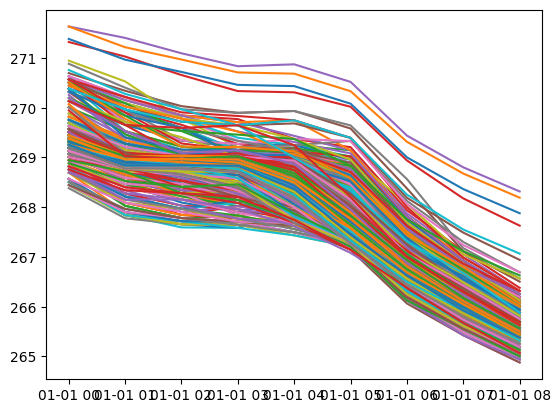

In [17]:
import matplotlib.pyplot as plt

c_data = w['data'][:,0,0,4]
#plt.plot(w['timestamp'],c_data)
t, m, n,p=w['data'].shape

for i in range(25,m-25):
    for j in range(25, n-25):
        plt.plot(w['timestamp'], w['data'][:,i,j,4])

In [18]:
w.files

['data', 'timestamp', 'paras', 'x_grid', 'y_grid']

In [20]:
w['x_grid']

array([[-78.3499  , -78.31748 , -78.28507 , ..., -76.22115 , -76.18907 ,
        -76.15699 ],
       [-78.34305 , -78.31062 , -78.2782  , ..., -76.21359 , -76.1815  ,
        -76.149414],
       [-78.3362  , -78.303764, -78.27133 , ..., -76.20603 , -76.173935,
        -76.14183 ],
       ...,
       [-77.88744 , -77.854294, -77.821144, ..., -75.71093 , -75.67814 ,
        -75.64535 ],
       [-77.880264, -77.84711 , -77.81395 , ..., -75.70302 , -75.67021 ,
        -75.63741 ],
       [-77.873085, -77.83991 , -77.80675 , ..., -75.69509 , -75.66228 ,
        -75.62947 ]], dtype=float32)

In [11]:
w['data'].shape

(57, 47, 18, 12)

In [20]:
w['paras']

array(['VIS_P0_L1_GLC0', 'GUST_P0_L1_GLC0', 'PRES_P0_L1_GLC0',
       'TMP_P0_L1_GLC0', 'TMP_P0_L103_GLC0', 'SPFH_P0_L103_GLC0',
       'DPT_P0_L103_GLC0', 'RH_P0_L103_GLC0', 'UGRD_P0_L103_GLC0',
       'VGRD_P0_L103_GLC0', 'DSWRF_P0_L1_GLC0', 'HPBL_P0_L1_GLC0'],
      dtype='<U17')

In [7]:
w['timestamp']

array(['2018-02-01T00:00:00.000000', '2018-02-01T01:00:00.000000',
       '2018-02-01T02:00:00.000000', '2018-02-01T03:00:00.000000',
       '2018-02-01T04:00:00.000000', '2018-02-01T05:00:00.000000',
       '2018-02-01T06:00:00.000000', '2018-02-01T07:00:00.000000',
       '2018-02-01T08:00:00.000000', '2018-02-01T09:00:00.000000',
       '2018-02-01T10:00:00.000000', '2018-02-01T11:00:00.000000',
       '2018-02-01T12:00:00.000000', '2018-02-01T13:00:00.000000',
       '2018-02-01T14:00:00.000000', '2018-02-01T15:00:00.000000',
       '2018-02-01T16:00:00.000000', '2018-02-01T17:00:00.000000',
       '2018-02-01T18:00:00.000000', '2018-02-01T19:00:00.000000',
       '2018-02-01T20:00:00.000000', '2018-02-01T21:00:00.000000',
       '2018-02-01T22:00:00.000000', '2018-02-01T23:00:00.000000',
       '2018-02-02T00:00:00.000000', '2018-02-02T01:00:00.000000',
       '2018-02-02T02:00:00.000000', '2018-02-02T03:00:00.000000',
       '2018-02-02T04:00:00.000000', '2018-02-02T05:00:00.0000